#### Assignment_05
Name: Yash Wadhwa NUID: 002778382

#### Understand in details the SVM classification technique. Apply it on the loan dataset using three different types of kernel and compare the performances.

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [120]:
df = pd.read_excel("/Users/wadhwa/Desktop/dsem/Assignment-5/loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [121]:
df['Decision'] = df['Decision'].replace(['accept','reject'],[1,0])
decision = df['Decision']
df

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,1
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,1
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,0
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,1
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,1


In [122]:
df = pd.get_dummies(df, columns=['Sex','Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref'])
df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [123]:
df.isnull().sum()

Age                     0
Time_at_address         0
Time_employed           0
Time_bank               0
Home_Expn               0
Balance                 0
Decision                0
Sex_F                   0
Sex_M                   0
Res_status_owner        0
Res_status_rent         0
Telephone_given         0
Telephone_not_given     0
Occupation_creative_    0
Occupation_driver       0
Occupation_executive    0
Occupation_guard_etc    0
Occupation_labourer     0
Occupation_manager      0
Occupation_office_st    0
Occupation_productio    0
Occupation_professio    0
Occupation_sales        0
Occupation_semi_pro     0
Occupation_unemploye    0
Job_status_governmen    0
Job_status_military     0
Job_status_private_s    0
Job_status_retired      0
Job_status_self_empl    0
Job_status_student      0
Job_status_unemploye    0
Liab_ref_f              0
Liab_ref_t              0
Acc_ref_given           0
Acc_ref_oth_inst_       0
dtype: int64

In [124]:
from sklearn.preprocessing import normalize
data = df.drop(['Decision'], axis=1)
scaled_data = normalize(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,0.330299,0.003807,0.000000,0.000000,0.943712,0.000000,0.000000,0.006508,0.006508,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.006508,0.006508,0.000000,0.006508,0.000000
1,0.138763,0.070545,0.000000,0.000000,0.987634,0.000000,0.000000,0.007055,0.000000,0.007055,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.007055,0.007055,0.000000
2,0.024006,0.006816,0.002272,0.006362,0.000000,0.999665,0.000454,0.000000,0.000454,0.000000,...,0.0,0.000454,0.0,0.000000,0.0,0.000000,0.000454,0.000000,0.000454,0.000000
3,0.983442,0.110187,0.086762,0.000000,0.000000,0.000000,0.000000,0.043381,0.000000,0.043381,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.043381,0.000000,0.043381,0.000000
4,0.127035,0.056460,0.000000,0.000000,0.990223,0.000000,0.000000,0.004343,0.004343,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.004343,0.000000,0.004343,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.110856,0.008922,0.006489,0.000000,0.752667,0.648851,0.000000,0.003244,0.003244,0.000000,...,0.0,0.000000,0.0,0.003244,0.0,0.000000,0.000000,0.003244,0.003244,0.000000
425,0.079206,0.004450,0.010679,0.000000,0.996747,0.000000,0.003560,0.000000,0.000000,0.003560,...,0.0,0.000000,0.0,0.000000,0.0,0.003560,0.003560,0.000000,0.003560,0.000000
426,0.049894,0.003208,0.002139,0.000000,0.902504,0.427727,0.000000,0.002139,0.002139,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002139,0.000000,0.002139,0.000000
427,0.067470,0.015390,0.006426,0.003213,0.257029,0.963858,0.000000,0.003213,0.000000,0.003213,...,0.0,0.003213,0.0,0.000000,0.0,0.000000,0.000000,0.003213,0.003213,0.000000


In [125]:
from sklearn.model_selection import train_test_split

X = scaled_data
y = df['Decision']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


#### 1. Using Linear Kernel to check accuracy.

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel = 'linear')

svm_linear.fit(X_train,Y_train)

y_pred=svm_linear.predict(X_test)
print('Model Accuracy using Linear Kernel: {0:0.2f} '.format(accuracy_score(Y_test, y_pred)))

Model Accuracy using Linear Kernel: 0.68 


#### 2. Using Polynomial Kernel to check accuracy

In [127]:
svm_poly = SVC(kernel = 'poly')

svm_poly.fit(X_train,Y_train)

y_pred=svm_poly.predict(X_test)
print('Model Accuracy using Polynomial Kernel: {0:0.2f} '.format(accuracy_score(Y_test, y_pred)))

Model Accuracy using Polynomial Kernel: 0.69 


##### Using Polynomial kernel with cost function value as 100

In [128]:
svm_poly = SVC(kernel = 'poly', C = 100)

svm_poly.fit(X_train,Y_train)

y_pred=svm_poly.predict(X_test)
print('Model Accuracy using Polynomial Kernel: {0:0.2f} '.format(accuracy_score(Y_test, y_pred)))

Model Accuracy using Polynomial Kernel: 0.71 


#### 3. Using RBF Kernel to check accuracy

In [129]:
svm_rbf = SVC(kernel = 'rbf')


svm_rbf.fit(X_train,Y_train)


y_pred=svm_rbf.predict(X_test)
print('Model Accuracy using RBF Kernel: {0:0.2f} '.format(accuracy_score(Y_test, y_pred)))

Model Accuracy using RBF Kernel: 0.68 


##### Using RBF Kernel with cost function value as 100

In [130]:
svm_rbf = SVC(kernel = 'rbf', C = 100)


svm_rbf.fit(X_train,Y_train)

y_pred=svm_rbf.predict(X_test)
print('Model Accuracy using RBF Kernel: {0:0.2f} '.format(accuracy_score(Y_test, y_pred)))

Model Accuracy using RBF Kernel: 0.69 


#### Building SVM model using linear kernel and given cost function value

Number of Support Vectors fitted by this model is : 337.0


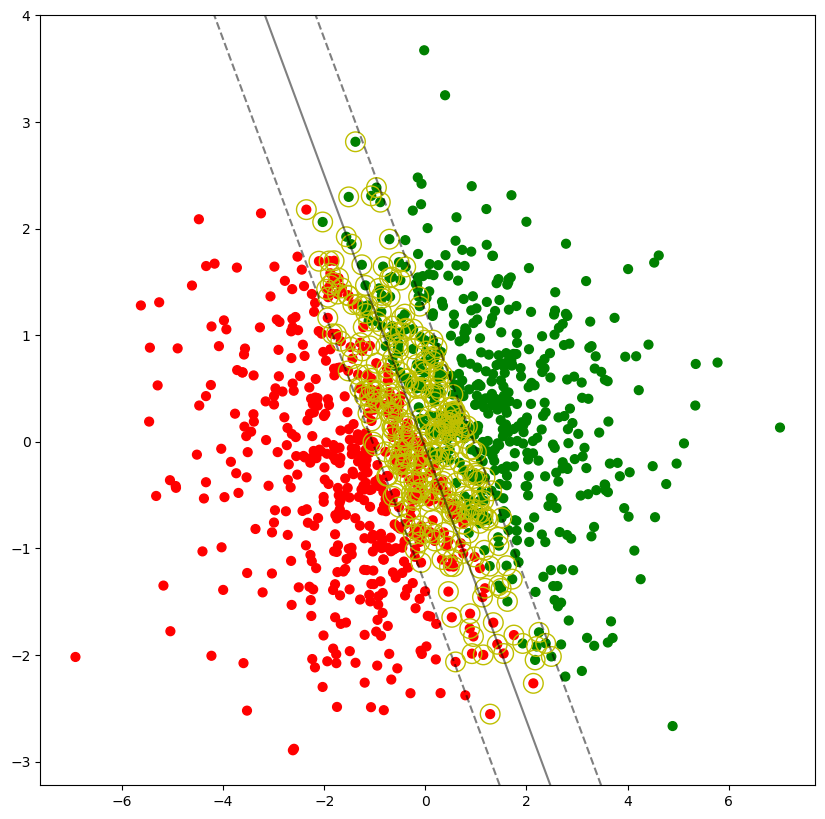

In [131]:
from numpy.core.memmap import dtype
from numpy.random import normal
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generating the data
x = normal(loc=0, scale=2, size=1000)
y = normal(loc=0, scale=1, size=1000)

yds1 = np.zeros((500,), dtype=int)
yds2 = np.ones((500,), dtype=int)

ys = np.concatenate((yds1, yds2))
X = np.stack((x, y), axis=1)

data= pd.DataFrame(x, columns = ['X'])
data['Y'] = y
data

Z =[]
for i in range(0,1000):
  if(x[i]+y[i]>0):
    Z.append(int(1))
  else:
    Z.append(int(0))

data['Z'] = Z
Z = data['Z'].to_numpy()

# Training the model
model = SVC(kernel='linear', C=0.01).fit(X, Z)

# Plotting the decision boundary and margins
def decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Get the decision function values
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
                   linewidth=1, facecolors='none', edgecolors='y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=Z, s=40, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256))
print("Number of Support Vectors fitted by this model is :",np.size(model.support_vectors_)/2)
decision_function(model, plot_support=True)
plt.show()


#### Building SVM model using linear Kernel with cost function 0.1

Number of Support Vectors fitted by this model is  180.0


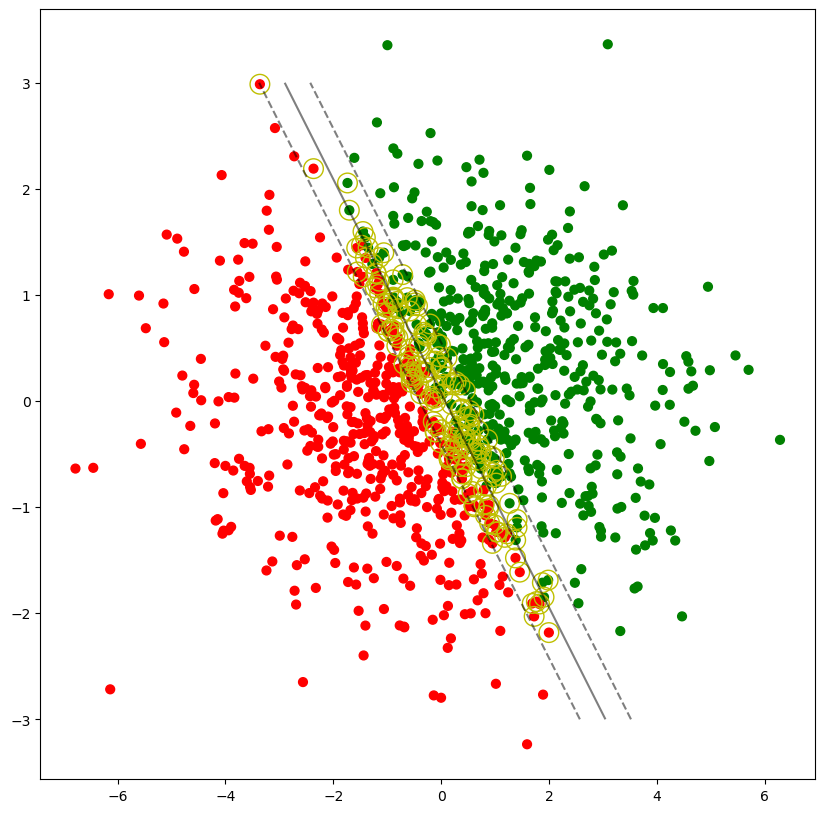

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC

# Decision function
def decision_function(model, plot_support=True):
    # Plot decision boundary and margins
    x = np.linspace(-4, 4, 30)
    y = np.linspace(-3, 3, 30)
    YY, XX = np.meshgrid(y, x)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        # plot support vectors
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='y')
        
# Generate data
x = np.random.normal(loc=0, scale=2, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

yds1 = np.zeros((500,), dtype=int)
yds2 = np.ones((500,), dtype=int)
ys = np.concatenate((yds1, yds2))
X = np.stack((x, y), axis=1)

data= pd.DataFrame(x, columns = ['X'])
data['Y'] = y

Z =[]
for i in range(0,1000):
    if x[i]+y[i]>0:
        Z.append(int(1))
    else:
        Z.append(int(0))
data['Z'] = Z
Z = data['Z'].to_numpy()

# Train SVM model
model = SVC(kernel='linear', C=0.1).fit(X, Z)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], c=Z, s=40, cmap=LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256))
print("Number of Support Vectors fitted by this model is ",np.size(model.support_vectors_)/2)

# Plot decision boundary and support vectors
decision_function(model, plot_support=True)


#### Building SVM model using Polynomial Kernel of Degree 1

Number of Support Vectors fitted by this model is  558.0


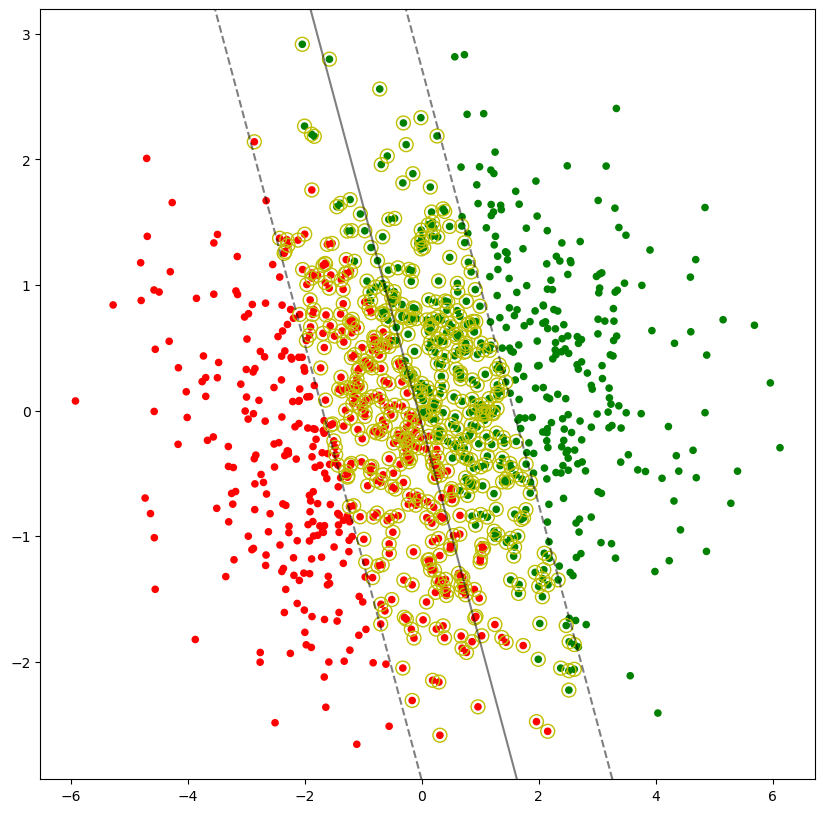

In [133]:
from numpy.random import normal
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

x = normal(loc=0, scale=2, size=1000)
y = normal(loc=0, scale=1, size=1000)
yds1 = np.zeros((500,), dtype=int)
yds2 = np.ones((500,), dtype=int)
ys = np.concatenate((yds1, yds2))
X = np.stack((x, y), axis=1)
data= pd.DataFrame(x, columns = ['X'])
data['Y'] = y

Z =[]
for i in range(0,1000):
    if(x[i]+y[i]>0):
        Z.append(int(1))
    else:
        Z.append(int(0))
data['Z'] = Z
Z = data['Z'].to_numpy()

# Fit a polynomial SVM
model_poly = SVC(kernel='poly', C=0.01, degree=1).fit(X, Z)

# Plot the decision function and support vectors
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=Z, s=20, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256))
print("Number of Support Vectors fitted by this model is ",np.size(model_poly.support_vectors_)/2)

def decision_function_poly(model, plot_support=True):
    # Plot the decision function for a 2D SVM
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        # Plot support vectors
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='y')

# Call decision_function_poly to plot the decision boundary and support vectors
decision_function_poly(model_poly, plot_support=True)


#### Building SVM model using Polynomial Kernel of Degree 3

Number of Support Vectors fitted by this model is  710.0


/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


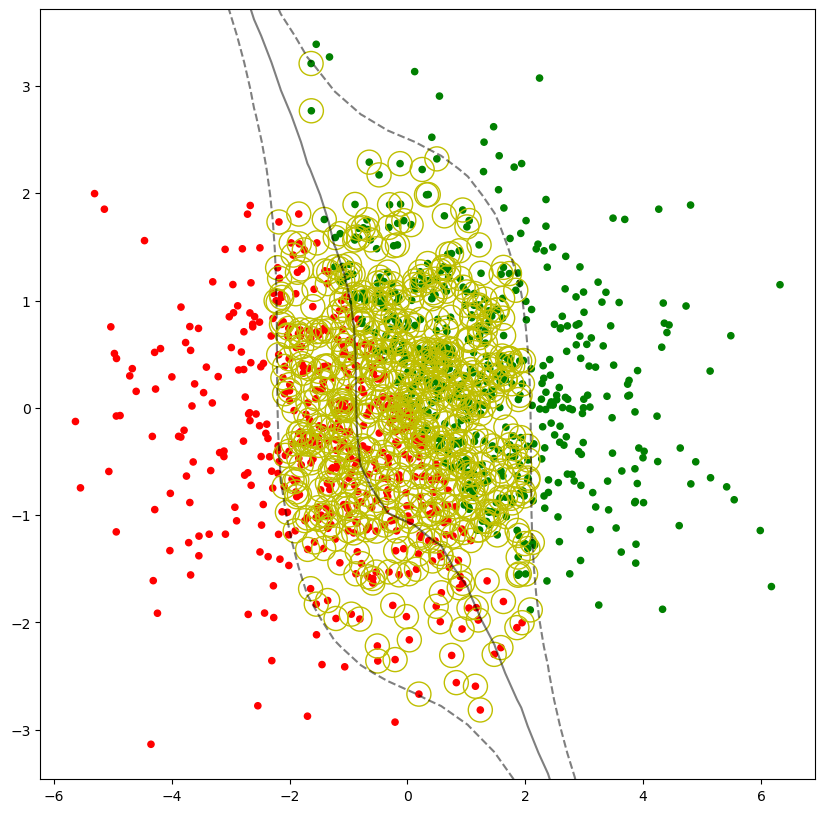

In [134]:
from numpy.core.memmap import dtype
from numpy.random import normal
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = normal(loc=0, scale=2, size=1000)
y = normal(loc=0, scale=1, size=1000)

z = np.where(x + y > 0, 1, 0)

data = pd.DataFrame({'x': x, 'y': y, 'z': z})

X = data[['x', 'y']]
Z = data['z']

# Fit the model with a polynomial kernel
model_poly = SVC(kernel='poly', C=0.01, degree=3).fit(X, Z)

# Plot the data points and the decision boundary
plt.figure(figsize=(10,10))
plt.scatter(X['x'], X['y'], c=Z, s=20, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256))
print("Number of Support Vectors fitted by this model is ", np.size(model_poly.support_vectors_)/2)

# Decision function
def decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='y')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the decision boundary and margins
decision_function(model_poly, plot_support=True)


#### Building SVM model using RBF Kernel of Degree 1

Number of Support Vectors fitted by this model is  580.0


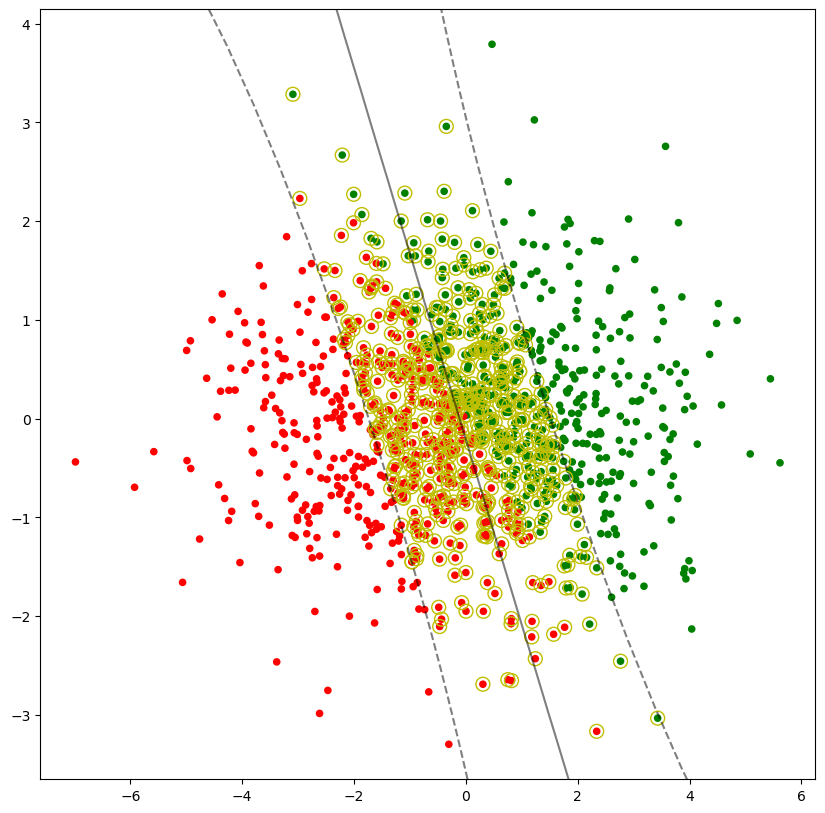

In [135]:
import numpy as np
import pandas as pd
from numpy.random import normal
from matplotlib.colors import LinearSegmentedColormap
from sklearn.svm import SVC

# Decision function
def decision_function(model, ax=None, plot_support=False):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Generate data
x = normal(loc=0, scale=2, size=1000)
y = normal(loc=0, scale=1, size=1000)

yds1 = np.zeros((500,), dtype=int)
yds2 = np.ones((500,), dtype=int)

ys = np.concatenate((yds1, yds2))
X = np.stack((x, y), axis=1)

data = pd.DataFrame(x, columns=['X'])
data['Y'] = y

# Generate labels
Z = []
for i in range(0, 1000):
    if(x[i]+y[i] > 0):
        Z.append(int(1))
    else:
        Z.append(int(0))

data['Z'] = Z
Z = data['Z'].to_numpy()

# Fit the RBF SVM model
model_rbf = SVC(kernel='rbf', C=0.1, degree=1, gamma=0.01).fit(X, Z)

# Plot the RBF SVM
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=Z, s=20, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256))
print("Number of Support Vectors fitted by this model is ", np.size(model_rbf.support_vectors_)/2)
decision_function(model_rbf, plot_support=True)

plt.show()


#### Outcomes:

In [136]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

svm_linear = SVC(kernel='linear', probability=True)
svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)

# Train the SVM models
svm_linear.fit(X_train, Y_train)
svm_poly.fit(X_train, Y_train)
svm_rbf.fit(X_train, Y_train)

# Predictions using the SVM models
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Probabilities for the ROC curve
y_proba_linear = svm_linear.predict_proba(X_test)[:, 1]
y_proba_poly = svm_poly.predict_proba(X_test)[:, 1]
y_proba_rbf = svm_rbf.predict_proba(X_test)[:, 1]

print('Linear kernel:')
print('Accuracy: {0:.2f}'.format(accuracy_score(Y_test, y_pred_linear)))
print('Precision: {0:.2f}'.format(precision_score(Y_test, y_pred_linear)))
print('Recall: {0:.2f}'.format(recall_score(Y_test, y_pred_linear)))
print('F1 score: {0:.2f}'.format(f1_score(Y_test, y_pred_linear)))
print('AUC score: {0:.2f}'.format(roc_auc_score(Y_test, y_proba_linear)))
print()

print('Polynomial kernel:')
print('Accuracy: {0:.2f}'.format(accuracy_score(Y_test, y_pred_poly)))
print('Precision: {0:.2f}'.format(precision_score(Y_test, y_pred_poly)))
print('Recall: {0:.2f}'.format(recall_score(Y_test, y_pred_poly)))
print('F1 score: {0:.2f}'.format(f1_score(Y_test, y_pred_poly)))
print('AUC score: {0:.2f}'.format(roc_auc_score(Y_test, y_proba_poly)))
print()

print('RBF kernel:')
print('Accuracy: {0:.2f}'.format(accuracy_score(Y_test, y_pred_rbf)))
print('Precision: {0:.2f}'.format(precision_score(Y_test, y_pred_rbf)))
print('Recall: {0:.2f}'.format(recall_score(Y_test, y_pred_rbf)))
print('F1 score: {0:.2f}'.format(f1_score(Y_test, y_pred_rbf)))
print('AUC score: {0:.2f}'.format(roc_auc_score(Y_test, y_proba_rbf)))
print()


Linear kernel:
Accuracy: 0.68
Precision: 0.70
Recall: 0.49
F1 score: 0.58
AUC score: 0.73

Polynomial kernel:
Accuracy: 0.69
Precision: 0.69
Recall: 0.54
F1 score: 0.61
AUC score: 0.73

RBF kernel:
Accuracy: 0.68
Precision: 0.67
Recall: 0.54
F1 score: 0.60
AUC score: 0.73



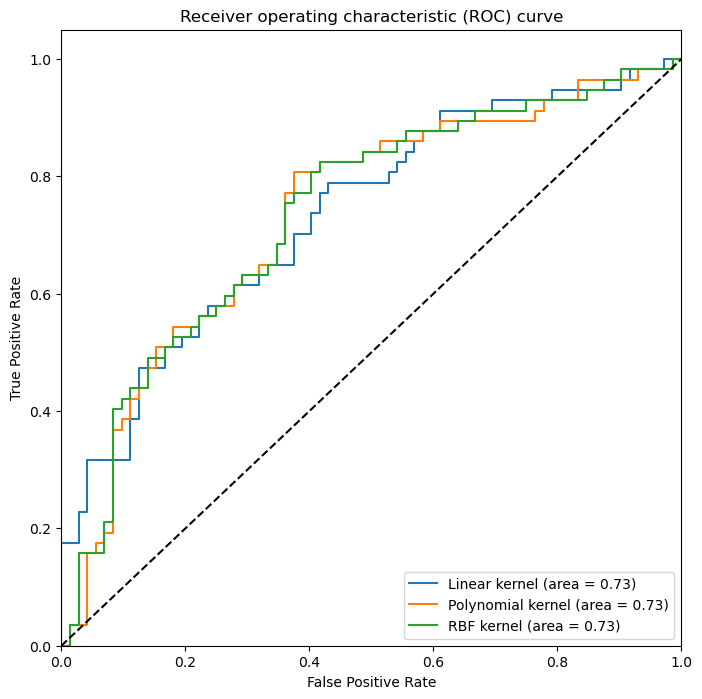

In [137]:
fpr_linear, tpr_linear, _ = roc_curve(Y_test, svm_linear.predict_proba(X_test)[:, 1])
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_poly, tpr_poly, _ = roc_curve(Y_test, svm_poly.predict_proba(X_test)[:, 1])
roc_auc_poly = auc(fpr_poly, tpr_poly)

fpr_rbf, tpr_rbf, _ = roc_curve(Y_test, svm_rbf.predict_proba(X_test)[:, 1])
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# ROC curves for each kernel
plt.figure(figsize=(8, 8))
plt.plot(fpr_linear, tpr_linear, label='Linear kernel (area = %0.2f)' % roc_auc_linear)
plt.plot(fpr_poly, tpr_poly, label='Polynomial kernel (area = %0.2f)' % roc_auc_poly)
plt.plot(fpr_rbf, tpr_rbf, label='RBF kernel (area = %0.2f)' % roc_auc_rbf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix Plot for the three kernels: Linear, Polynomial and RBF

/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be remove

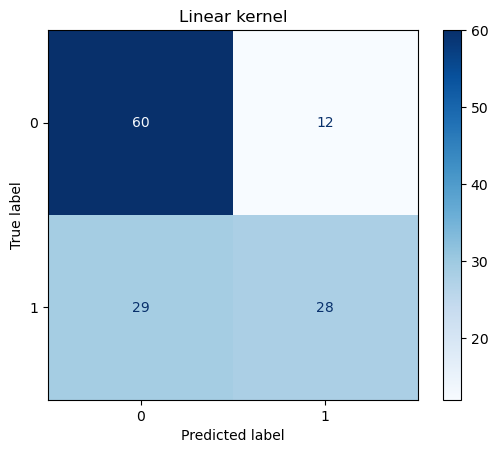

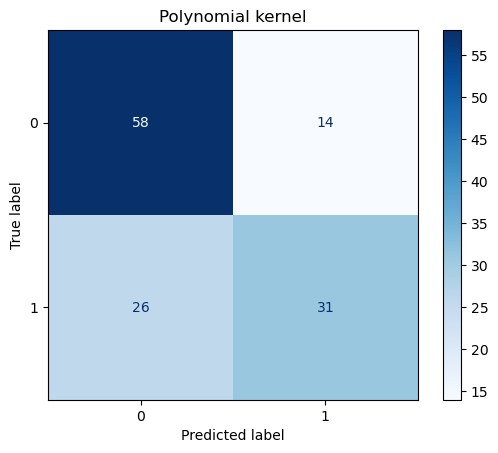

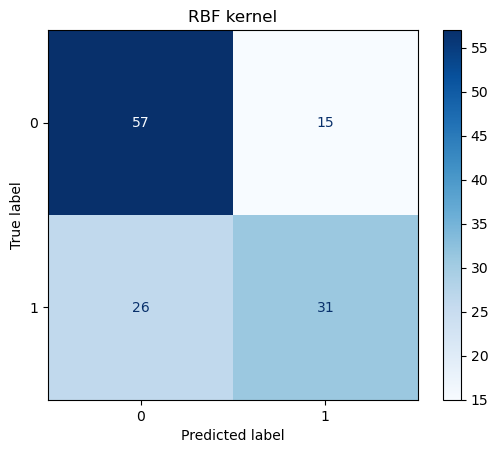

In [138]:
from sklearn.metrics import plot_confusion_matrix

# confusion matrices for the SVM models
disp_linear = plot_confusion_matrix(svm_linear, X_test, Y_test, cmap=plt.cm.Blues)
disp_linear.ax_.set_title('Linear kernel')

disp_poly = plot_confusion_matrix(svm_poly, X_test, Y_test, cmap=plt.cm.Blues)
disp_poly.ax_.set_title('Polynomial kernel')

disp_rbf = plot_confusion_matrix(svm_rbf, X_test, Y_test, cmap=plt.cm.Blues)
disp_rbf.ax_.set_title('RBF kernel')

plt.show()
